# 최종버전 10사용할거임
베스트셀러_최종버전11.csv
비베스트셀러_최종버전11.csv

In [1]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전12.csv')
df1 = pd.read_csv('비베스트셀러_최종버전11.csv')

In [14]:
df['kyobo_score'].describe()

count    5143.000000
mean        5.646374
std         5.056684
min         0.000000
25%         3.250000
50%         4.180000
75%         6.260000
max        48.050000
Name: kyobo_score, dtype: float64

# 장르별 도서평가점수

In [2]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform = df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df = ranked_df.sort_values('CLASS_NO')

# 6. 출력
ranked_df

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,kyobo,4.11,aladin,3.37,yes24,3.18,yp,0.34
1,"강연집, 수필집, 연설문집",yes24,4.30,kyobo,4.26,aladin,3.00,yp,1.40
2,"건축, 건축학",kyobo,7.46,yes24,4.20,aladin,3.63,yp,1.41
3,경제학,kyobo,5.92,yes24,3.51,aladin,3.23,yp,0.45
4,경학,kyobo,5.33,aladin,3.05,yes24,2.42,yp,0.24
...,...,...,...,...,...,...,...,...,...
70,행정학,kyobo,4.07,aladin,3.45,yes24,2.03,yp,0.00
71,형이상학,kyobo,5.03,aladin,2.99,yes24,1.82,yp,0.00
72,화학,kyobo,3.74,aladin,2.68,yes24,2.46,yp,0.00
73,화학공학,kyobo,3.41,aladin,3.38,yes24,2.95,yp,0.38


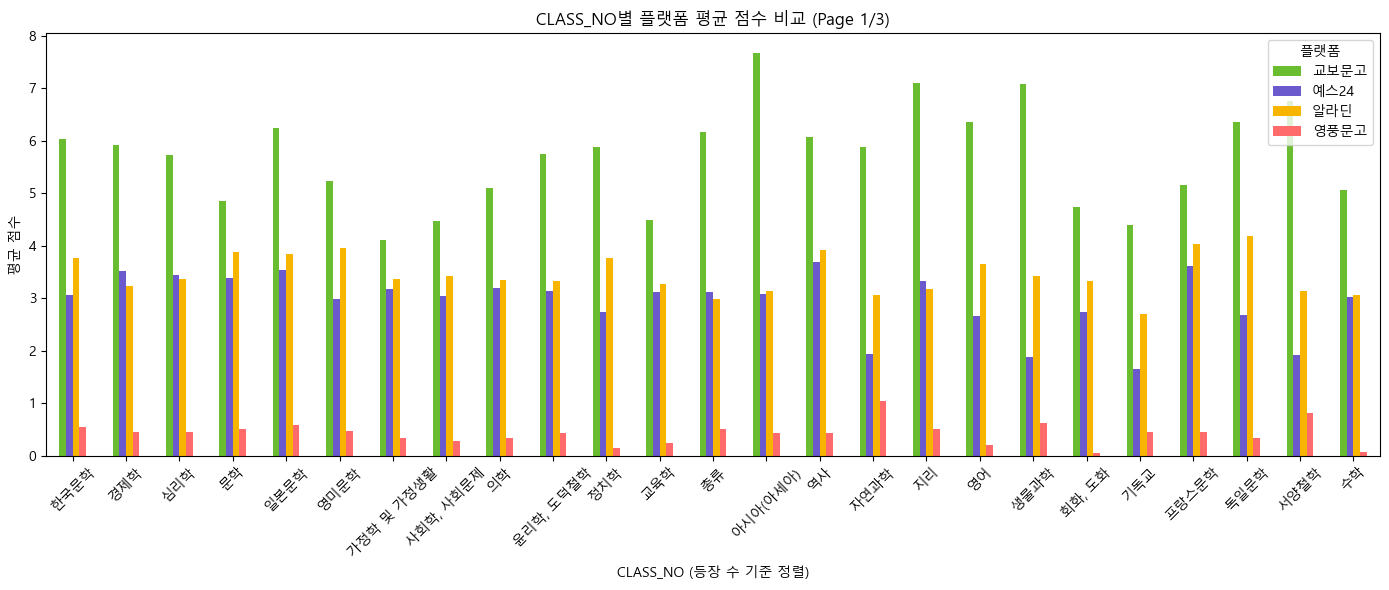

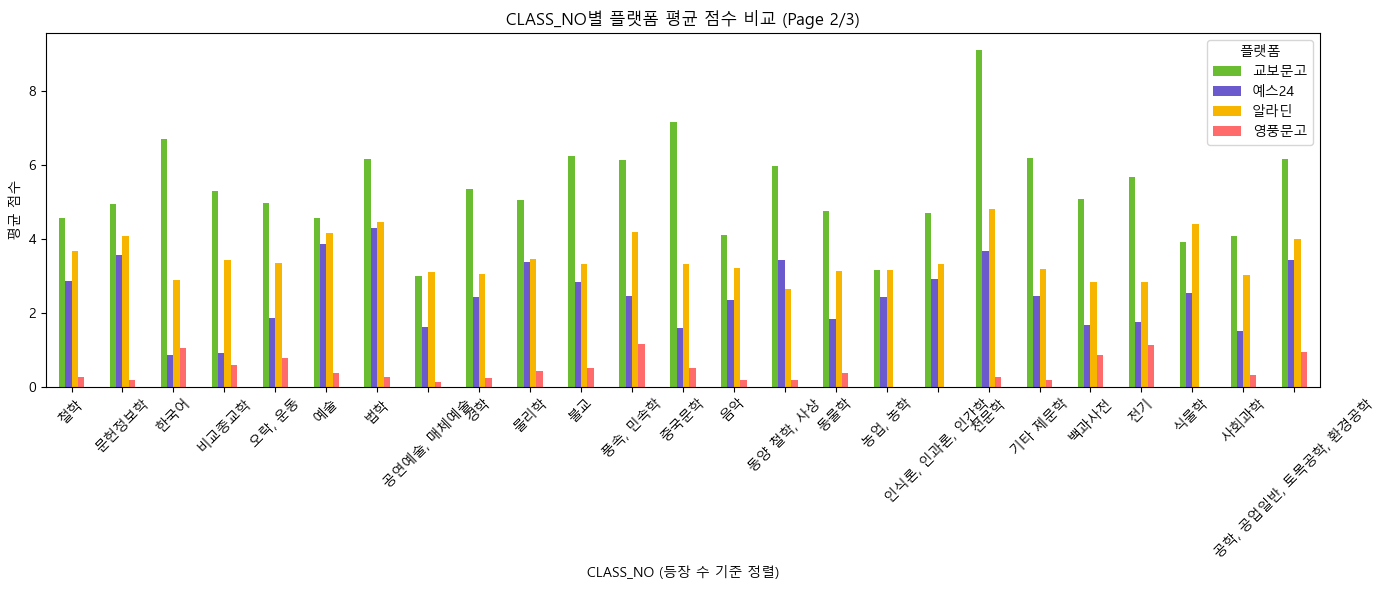

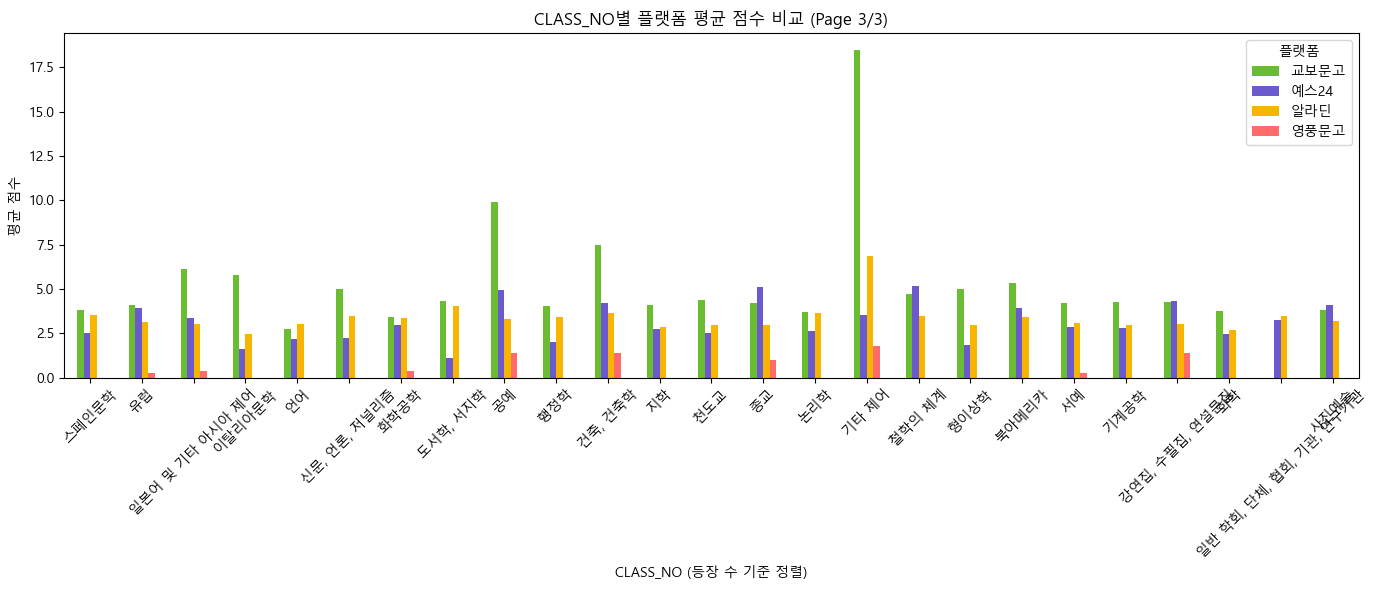

In [ ]:
import matplotlib.pyplot as plt
import math
# 베스트
# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 열 이름 변경 (원본 컬럼명을 원하는 플랫폼명으로)
genre_score_renamed = genre_score_by_platform.rename(columns={
    'kyobo_score': '교보문고',
    'yes24_score': '예스24',
    'aladin_score': '알라딘',
    'yp_score': '영풍문고'
})

# ✅ 정렬 기준 정리
class_counts = df['CLASS_NO'].value_counts()
genre_score_sorted = genre_score_renamed.loc[class_counts.index.intersection(genre_score_renamed.index)]
genre_score_sorted = genre_score_sorted.reindex(class_counts.index)

# ✅ 페이지 나누기 설정
n_pages = 3
total_rows = len(genre_score_sorted)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 색상과 플랫폼 순서
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced[platforms].plot(kind='bar', figsize=(14, 6), color=colors)
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()



In [6]:
print(ranked_df['1위'].value_counts(), ranked_df['2위'].value_counts(), ranked_df['3위'].value_counts())

1위
kyobo     67
yes24      4
aladin     4
Name: count, dtype: int64 2위
aladin    57
yes24     11
kyobo      7
Name: count, dtype: int64 3위
yes24     59
aladin    14
kyobo      1
yp         1
Name: count, dtype: int64


In [10]:
ranked_df[ranked_df['1위'] == 'kyobo'][40:]

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
45,유럽,kyobo,4.08,yes24,3.92,aladin,3.16,yp,0.24
46,"윤리학, 도덕철학",kyobo,5.75,aladin,3.33,yes24,3.14,yp,0.44
47,음악,kyobo,4.09,aladin,3.21,yes24,2.34,yp,0.18
48,의학,kyobo,5.10,aladin,3.35,yes24,3.20,yp,0.33
49,이탈리아문학,kyobo,5.78,aladin,2.45,yes24,1.60,yp,0.00
50,"인식론, 인과론, 인간학",kyobo,4.70,aladin,3.32,yes24,2.92,yp,0.00
52,일본문학,kyobo,6.25,aladin,3.84,yes24,3.54,yp,0.58
53,일본어 및 기타 아시아 제어,kyobo,6.14,yes24,3.34,aladin,3.05,yp,0.35
54,자연과학,kyobo,5.87,aladin,3.06,yes24,1.93,yp,1.05
55,전기,kyobo,5.67,aladin,2.82,yes24,1.74,yp,1.14


In [11]:
ranked_df[ranked_df['1위'] == 'yes24']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,"강연집, 수필집, 연설문집",yes24,4.30,kyobo,4.26,aladin,3.00,yp,1.40
27,사진예술,yes24,4.11,kyobo,3.80,aladin,3.20,yp,0.00
57,종교,yes24,5.12,kyobo,4.23,aladin,2.99,yp,0.97
64,철학의 체계,yes24,5.19,kyobo,4.72,aladin,3.47,yp,0.00


In [12]:
ranked_df[ranked_df['1위'] == 'aladin']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
5,"공연예술, 매체예술",aladin,3.10,kyobo,2.99,yes24,1.62,yp,0.14
35,식물학,aladin,4.39,kyobo,3.92,yes24,2.53,yp,0.00
39,언어,aladin,3.05,kyobo,2.72,yes24,2.18,yp,0.00
51,"일반 학회, 단체, 협회, 기관, 연구기관",aladin,3.50,yes24,3.26,kyobo,0.00,yp,0.00


In [ ]:
ranked_df['1위점수'] > 2 

- 베스트
대부분의 장르에서 교보문고가 우세한 모습(89%)
이 중 건축, 공예, 기타 제문학, 기타 제어, 생물과학, 아시아, 이탈리아 문학, 일본어, 천문학은 점수 차가 3점 이상 차이 나는 장르 존재
강연집, 사진예술, 종교, 철학의 체계 분야는 yes24가 우세함, 2위랑 1점 미만차이
공연예술, 식물학, 언어, 일반학회 장르는 aladin이 우세, 2위랑 1점 미만차이

-> 사람들이 많이 찾는 도서의 경우 대부분 교보문고에서 베스트셀러가 많이 나옴
-> 반면 상대적으로 덜 찾는 장르의 도서는 yes24, aladin에서도 베스트셀러가 나오며 점수 또한 좋음
-> 베스트셀러가 목적인 도서의 경우 교보문고의 우선투자는 필수이고 다른 플랫폼도 투자할 필요성 높음, 하지만 플랫폼별 베스트셀러 데이터를 조금 더 살펴봐야 할 필요성

- 점수 1점 차이
score 1점 차이는 감성점수 약 1.4%p, 리뷰 수 1개, 별점 0.06점 차이로 발생했지만, 가중치가 각각 0.5, 0.05, 0.45인 점을 고려하면, 전체 평균 대비 감성점수의 작은 변화도 누적되면 더 큰 차이를 만들 수 있으며, 실제로는 더 민감하게 작용할 수 있습니다
감성점수는 가중치는 높지만 수치 변화 폭은 작다
반대로 리뷰 수는 가중치는 낮지만 한 개가 바로 영향을 준다
따라서, 데이터 전체 범위에서 보면 감성점수는 작은 변화로 큰 차이를 만들 수 있다

In [5]:
# 조건을 만족하는 행만 필터링
filtered_df = ranked_df[ranked_df["1위점수"] - ranked_df["2위점수"] >= 3]

# 결과 출력
filtered_df


,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
2,"건축, 건축학",kyobo,7.46,yes24,4.20,aladin,3.63,yp,1.41
6,공예,kyobo,9.91,yes24,4.96,aladin,3.32,yp,1.38
11,기타 제문학,kyobo,6.19,aladin,3.19,yes24,2.46,yp,0.17
12,기타 제어,kyobo,18.50,aladin,6.84,yes24,3.54,yp,1.79
30,생물과학,kyobo,7.08,aladin,3.42,yes24,1.88,yp,0.62
31,서양철학,kyobo,6.75,aladin,3.13,yes24,1.92,yp,0.82
38,아시아(아세아),kyobo,7.66,aladin,3.13,yes24,3.09,yp,0.44
49,이탈리아문학,kyobo,5.78,aladin,2.45,yes24,1.60,yp,0.00
58,중국문학,kyobo,7.15,aladin,3.32,yes24,1.59,yp,0.50
59,지리,kyobo,7.09,yes24,3.33,aladin,3.17,yp,0.52


In [5]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform1 = df1.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform1.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df1 = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df1 = ranked_df1.sort_values('CLASS_NO')

# 6. 출력
ranked_df1

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,2.14,kyobo,1.88,aladin,1.56,yp,0.04
1,"강연집, 수필집, 연설문집",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,"건축, 건축학",yes24,1.50,kyobo,1.41,yp,0.76,aladin,0.75
3,경제학,yes24,1.60,kyobo,1.50,aladin,1.34,yp,0.07
4,경학,kyobo,1.61,aladin,0.99,yes24,0.79,yp,0.35
...,...,...,...,...,...,...,...,...,...
70,행정학,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
71,형이상학,aladin,1.40,kyobo,1.18,yes24,0.00,yp,0.00
72,화학,kyobo,2.70,yes24,1.40,aladin,1.14,yp,0.00
73,화학공학,aladin,1.34,yes24,1.26,kyobo,1.21,yp,0.00


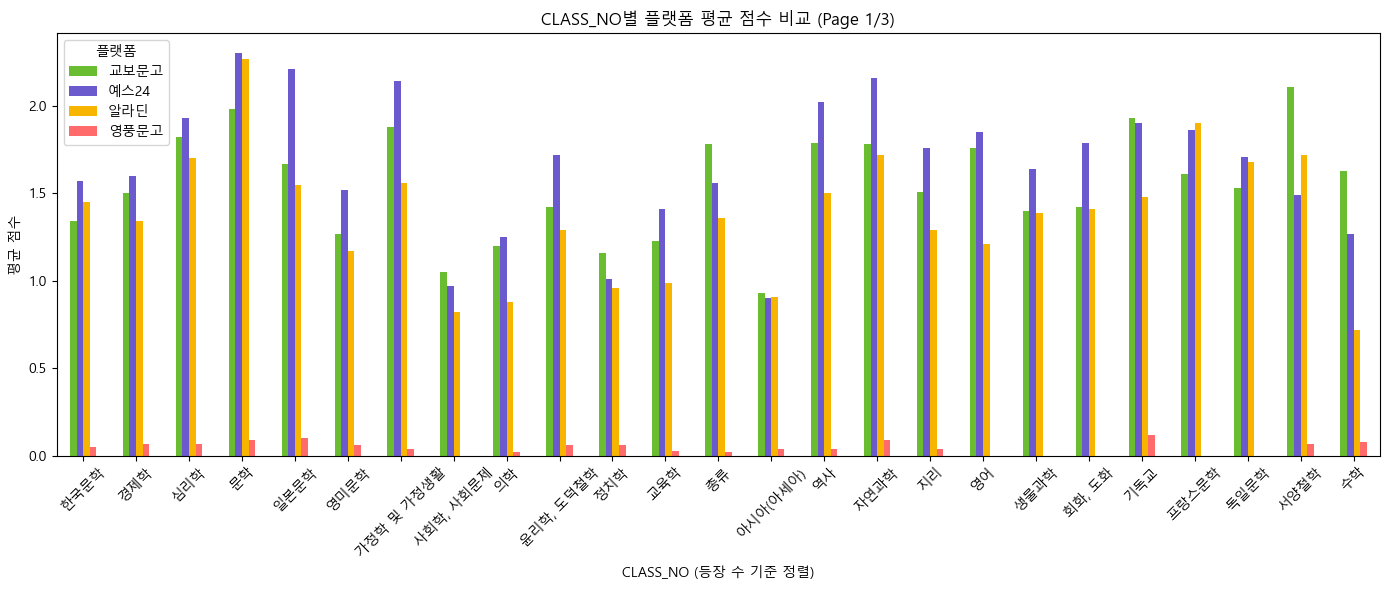

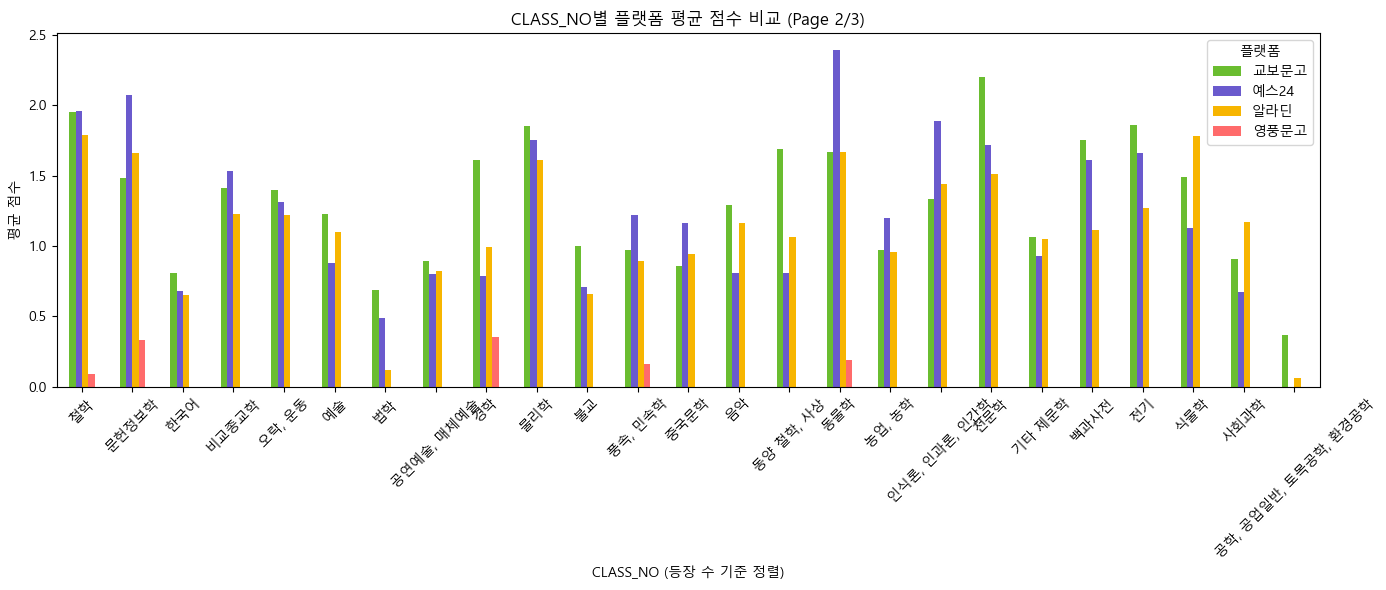

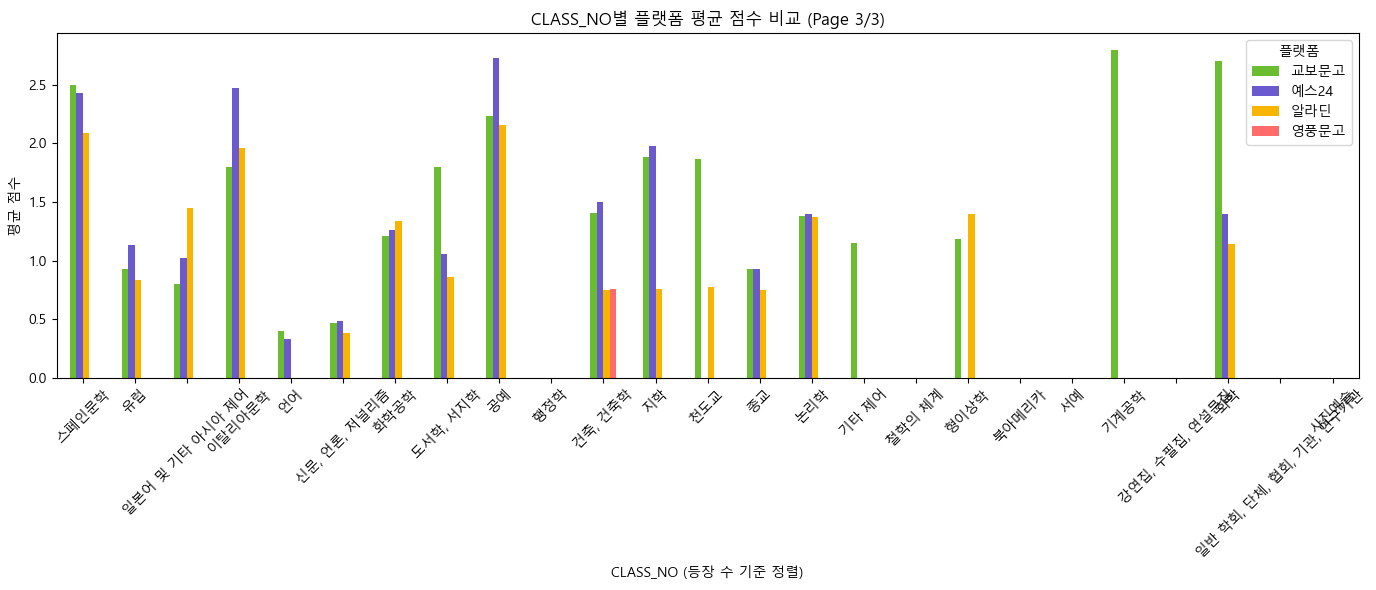

In [6]:
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 플랫폼 및 색상 설정
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ 열 이름 변경
genre_score_renamed1 = genre_score_by_platform1.rename(columns={
    'kyobo_score': '교보문고',
    'yes24_score': '예스24',
    'aladin_score': '알라딘',
    'yp_score': '영풍문고'
})

# ✅ CLASS_NO 등장 수 기준 정렬
class_counts = df1['CLASS_NO'].value_counts()
genre_score_sorted1 = genre_score_renamed1.loc[class_counts.index.intersection(genre_score_renamed1.index)]
genre_score_sorted1 = genre_score_sorted1.reindex(class_counts.index)

# ✅ 페이지 나누기
n_pages = 3
total_rows = len(genre_score_sorted1)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted1.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced[platforms].plot(kind='bar', figsize=(14, 6), color=colors)
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


In [21]:
print(ranked_df1['1위'].value_counts(), ranked_df1['2위'].value_counts(), ranked_df1['3위'].value_counts())

1위
kyobo     37
yes24     32
aladin     6
Name: count, dtype: int64 2위
kyobo     28
aladin    26
yes24     21
Name: count, dtype: int64 3위
aladin    42
yes24     22
kyobo     10
yp         1
Name: count, dtype: int64


In [24]:
ranked_df1[ranked_df1['1위'] == 'kyobo'][20:40]

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
34,스페인문학,kyobo,2.50,yes24,2.43,aladin,2.09,yp,0.00
38,아시아(아세아),kyobo,0.93,aladin,0.91,yes24,0.90,yp,0.04
39,언어,kyobo,0.40,yes24,0.33,aladin,0.00,yp,0.00
43,예술,kyobo,1.23,aladin,1.10,yes24,0.88,yp,0.00
44,"오락, 운동",kyobo,1.40,yes24,1.31,aladin,1.22,yp,0.00
47,음악,kyobo,1.29,aladin,1.16,yes24,0.81,yp,0.00
51,"일반 학회, 단체, 협회, 기관, 연구기관",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
55,전기,kyobo,1.86,yes24,1.66,aladin,1.27,yp,0.00
56,정치학,kyobo,1.16,yes24,1.01,aladin,0.96,yp,0.06
57,종교,kyobo,0.93,yes24,0.93,aladin,0.75,yp,0.00


In [25]:
ranked_df1[ranked_df1['1위'] == 'yes24']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,2.14,kyobo,1.88,aladin,1.56,yp,0.04
2,"건축, 건축학",yes24,1.50,kyobo,1.41,yp,0.76,aladin,0.75
3,경제학,yes24,1.60,kyobo,1.50,aladin,1.34,yp,0.07
6,공예,yes24,2.73,kyobo,2.23,aladin,2.16,yp,0.00
8,교육학,yes24,1.41,kyobo,1.23,aladin,0.99,yp,0.03
13,논리학,yes24,1.40,kyobo,1.38,aladin,1.37,yp,0.00
14,"농업, 농학",yes24,1.20,kyobo,0.97,aladin,0.96,yp,0.00
16,독일문학,yes24,1.71,aladin,1.68,kyobo,1.53,yp,0.00
17,동물학,yes24,2.39,kyobo,1.67,aladin,1.67,yp,0.19
19,문학,yes24,2.30,aladin,2.27,kyobo,1.98,yp,0.09


In [27]:
# 1위가 'yes24'인 행 중에서, 1위 점수와 2위 점수 차이가 0.5 이상인 경우
filtered_df = ranked_df1[
    (ranked_df1['1위'] == 'yes24') & 
    ((ranked_df1['1위점수'] - ranked_df1['2위점수']) >= 0.5)
]
filtered_df

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
6,공예,yes24,2.73,kyobo,2.23,aladin,2.16,yp,0.00
17,동물학,yes24,2.39,kyobo,1.67,aladin,1.67,yp,0.19
49,이탈리아문학,yes24,2.47,aladin,1.96,kyobo,1.80,yp,0.00
52,일본문학,yes24,2.21,kyobo,1.67,aladin,1.55,yp,0.10


In [28]:
ranked_df1[ranked_df1['1위'] == 'aladin']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
28,사회과학,aladin,1.17,kyobo,0.91,yes24,0.67,yp,0.0
35,식물학,aladin,1.78,kyobo,1.49,yes24,1.13,yp,0.0
53,일본어 및 기타 아시아 제어,aladin,1.45,yes24,1.02,kyobo,0.80,yp,0.0
67,프랑스문학,aladin,1.90,yes24,1.86,kyobo,1.61,yp,0.0
71,형이상학,aladin,1.40,kyobo,1.18,yes24,0.00,yp,0.0
73,화학공학,aladin,1.34,yes24,1.26,kyobo,1.21,yp,0.0


- 비베스트
반대로 비베스트셀러의 경우 대부분의 경우 교보가 우세(49%)
이 중 기계공학, 화학 장르에서 특히 우세함(1점 이상 차이)
yes24는 1위 비율(42%), 이 중 공예, 동물학, 이탈리아문학, 일본문학에서 상대적으로 강세(0.5점 이상 차이)
사회과학, 식물학, 일본어, 프랑스문학, 형이상학, 화학공학은 aladin이 우세함(하지만 큰 차이를 보여주진 않음, 0.5점 이하의 차이)

-> 비베스트셀러의 경우 교보와 yes24에서 점수가 비등비등한편, 베스트셀러에 비해 젙체적인 점수 차가 적은편이지만 베스트셀러를 목적으로 하는 도서가 아닐 경우 장르에 맞게 플랫폼별로 상대적으로 투자를 한다면 더 좋은 성과를 얻을 가능성이 상대적으로 높음
-> 또한 동물학, 이탈리아문학, 일본문학처럼 특정 장르의 매니아층이 yes24에서 주로 구매를 했을 것이라 추정됨

# 출판시기별 도서평가점수

In [7]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PUBLER_YEAR별 평균 점수 계산
pubyear_score_by_platform = df.groupby('PUBLER_YEAR')[platform_scores].mean().round(2)

# 3. 각 PUBLER_YEAR별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_py = []

for pub_year, row in pubyear_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_py.append({
        'PUBLER_YEAR': pub_year,  # ✅ 여기를 수정
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_py = pd.DataFrame(ranked_results_by_py)

# 5. 출판연도 기준 정렬
ranked_by_py = ranked_by_py.sort_values('PUBLER_YEAR')

# 6. 출력
ranked_by_py

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1998,aladin,8.86,yes24,6.95,yp,2.80,kyobo,0.00
1,2000,kyobo,11.03,aladin,10.39,yes24,6.82,yp,2.62
2,2001,kyobo,14.65,aladin,8.74,yes24,5.48,yp,0.78
3,2002,kyobo,7.40,aladin,6.65,yes24,4.79,yp,1.87
4,2003,aladin,10.93,yes24,6.16,yp,1.40,kyobo,0.00
5,2004,kyobo,14.18,aladin,9.36,yes24,6.48,yp,1.72
6,2005,aladin,10.39,yes24,5.88,kyobo,2.62,yp,1.39
7,2006,kyobo,22.52,aladin,14.10,yes24,7.22,yp,2.82
8,2007,aladin,7.08,kyobo,5.88,yes24,5.73,yp,1.07
9,2008,yes24,5.22,aladin,3.76,kyobo,1.09,yp,0.70


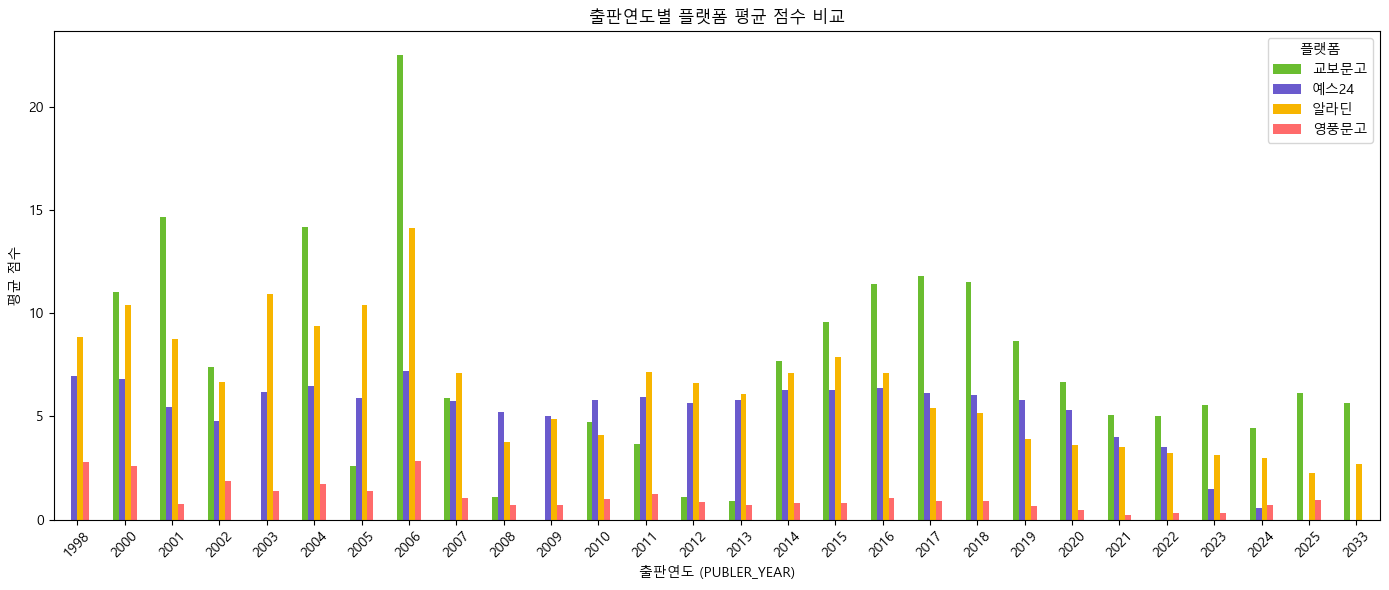

In [ ]:
import matplotlib.pyplot as plt
# 베스트
# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 플랫폼 이름 변경
pubyear_score_renamed = pubyear_score_by_platform.rename(columns={
    'kyobo_score': '교보문고',
    'yes24_score': '예스24',
    'aladin_score': '알라딘',
    'yp_score': '영풍문고'
})

# ✅ 색상 지정
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ 그래프 그리기
pubyear_score_renamed[platforms].plot(kind='bar', figsize=(14, 6), color=colors)

plt.title('출판연도별 플랫폼 평균 점수 비교')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [31]:
df[df['PUBLER_YEAR'] == 2006][['kyobo_score', 'yes24_score', 'aladin_score', 'yp_score', 'TITLE']]

,kyobo_score,yes24_score,aladin_score,yp_score,TITLE
100,0.00,7.07,10.88,2.80,예루살렘의 아이히만 :악의 평범성에 대한 보고서
791,45.04,7.38,17.32,2.85,코스모스 :특별판


In [32]:
ranked_by_py['1위'].value_counts()

1위
kyobo     18
aladin     7
yes24      3
Name: count, dtype: int64

In [33]:
ranked_by_py['2위'].value_counts()

2위
aladin    14
yes24     12
kyobo      2
Name: count, dtype: int64

In [27]:
ranked_by_py[ranked_by_py['1위'] == 'kyobo']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,2000,kyobo,118.66,aladin,110.92,yes24,63.92,yp,2.40
2,2001,kyobo,178.42,aladin,89.51,yes24,54.04,yp,1.84
3,2002,kyobo,79.80,aladin,60.93,yes24,47.02,yp,1.20
5,2004,kyobo,186.78,aladin,98.49,yes24,61.52,yp,1.13
7,2006,kyobo,297.33,aladin,167.48,yes24,72.60,yp,2.15
8,2007,kyobo,68.04,aladin,67.84,yes24,50.43,yp,1.93
15,2014,kyobo,82.41,aladin,68.06,yes24,57.51,yp,3.92
16,2015,kyobo,107.99,aladin,77.76,yes24,57.05,yp,0.81
17,2016,kyobo,130.04,aladin,67.17,yes24,59.37,yp,2.28
18,2017,kyobo,132.13,yes24,55.91,aladin,44.99,yp,1.17


In [34]:
ranked_by_py[ranked_by_py['1위'] == 'yes24']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
9,2008,yes24,5.22,aladin,3.76,kyobo,1.09,yp,0.70
10,2009,yes24,5.02,aladin,4.87,yp,0.72,kyobo,0.00
11,2010,yes24,5.79,kyobo,4.73,aladin,4.09,yp,1.01


In [35]:
ranked_by_py[ranked_by_py['1위'] == 'aladin']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1998,aladin,8.86,yes24,6.95,yp,2.80,kyobo,0.00
4,2003,aladin,10.93,yes24,6.16,yp,1.40,kyobo,0.00
6,2005,aladin,10.39,yes24,5.88,kyobo,2.62,yp,1.39
8,2007,aladin,7.08,kyobo,5.88,yes24,5.73,yp,1.07
12,2011,aladin,7.16,yes24,5.96,kyobo,3.66,yp,1.25
13,2012,aladin,6.64,yes24,5.64,kyobo,1.09,yp,0.84
14,2013,aladin,6.10,yes24,5.80,kyobo,0.89,yp,0.72


- 베스트셀러
출판년도별 점수 또한 대부분 교보가 우세(64%)
특이사항으로 2006년도에 압도적으로 높은 점수를 가진 도서가 교보에 있음, -> 해당 도서확인 필요(코스모스 특별판)
또한, 대부분 2위랑 점수 차가 10점 이상 차이 남
2008, 2009, 2010년도에 yes24가 우세함(약 1점 이상 차이)
1998, 2003, 2005, 2007, 2011, 2012, 2013년도에서 알라딘이 우세함(1~4점 차이)
특이사항으로 알라딘이 우세한 6개의 년도에서 2위는 yes24
2011년도부터 출판한 책들의 데이터의 경우 교보가 많이 우세함
반면 알라딘은 2000~2005년 까지 우세하다가 이후 감소하는 경향, 사람들이 오래된 도서를 더 많이 긍정정인 평가를 하고 신간도서의 경우 알라딘이 아닌 다른 플랫퐆에서 주로 구매할 가능성 농후
yes24는 연도와 관계없이 대체로 일정한 점수대를 유지함(약 5~7점)

-> 이것으로 보아 각 출판년도 도서별로 고객들의 만족도가 높은 도서는 대부분 교보문고, 2위와 압도적인 차이를 보여줌
-> 최신 베스트셀러들의 경우 교보가 이를 잘 캐치하거나 도서 흥행을 위해 교보 자체적으로 마케팅에 힘을 실을 가능성 있음
-> 새로운 책을 출판한다면 교보를 우선 투저하애함(베스트셀러가 목적이라면)
-> 다만 새로운 책이 아닌 예전 책을 편집하거나 하는 등의 도서를 출판한다면 꼭 교보 중심으로 투자보다는 yes24, 알라딘이 강세였던 시기에 적절하게 분배해서 투자하는 것도 좋다고 판단됨

In [9]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PUBLER_YEAR별 평균 점수 계산
pubyear_score_by_platform1 = df1.groupby('PUBLER_YEAR')[platform_scores].mean().round(2)

# 3. 각 PUBLER_YEAR별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_py = []

for pub_year, row in pubyear_score_by_platform1.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_py.append({
        'PUBLER_YEAR': pub_year,  # ✅ 여기를 수정
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_py1 = pd.DataFrame(ranked_results_by_py)

# 5. 출판연도 기준 정렬
ranked_by_py1 = ranked_by_py1.sort_values('PUBLER_YEAR')

# 6. 출력
ranked_by_py1

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
1,1961,yes24,2.43,kyobo,0.00,aladin,0.00,yp,0.00
2,1967,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
3,1968,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
4,1982,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
5,1993,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
6,1995,yes24,1.64,kyobo,0.95,aladin,0.76,yp,0.00
7,1996,aladin,3.14,yes24,2.35,kyobo,1.40,yp,0.00
8,1997,yes24,1.50,aladin,0.86,kyobo,0.00,yp,0.00
9,1998,yes24,0.96,kyobo,0.00,aladin,0.00,yp,0.00


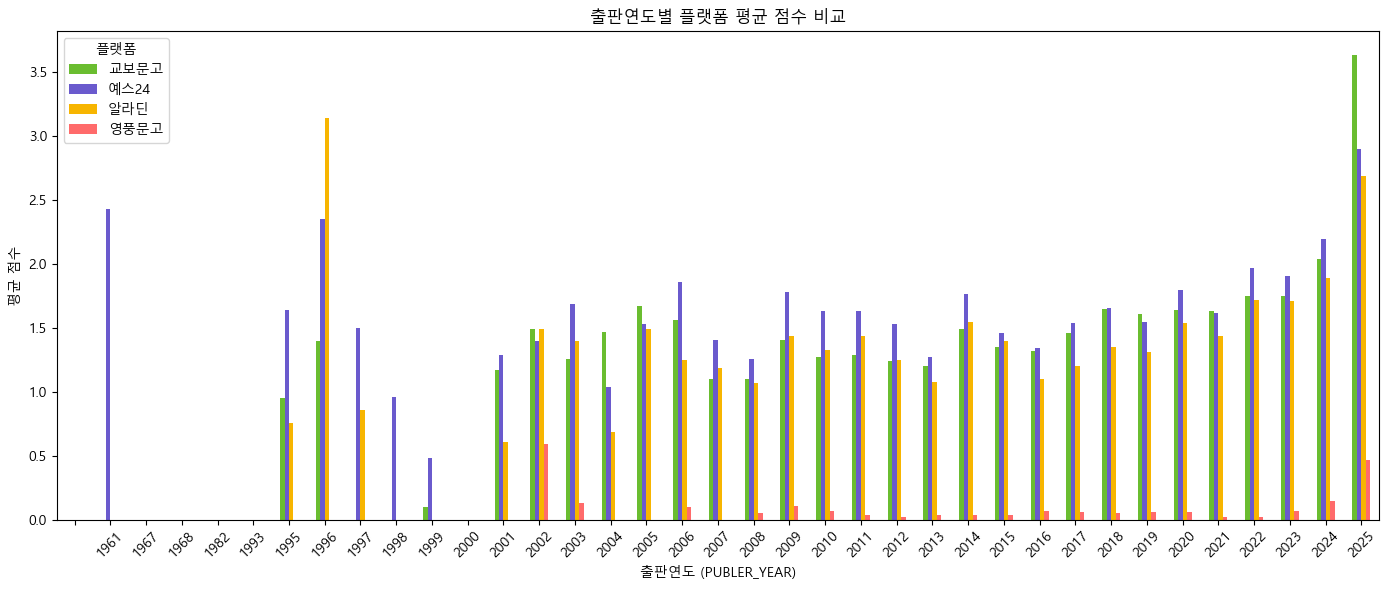

In [ ]:
import matplotlib.pyplot as plt
# 비베스트
# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 열 이름 변경
pubyear_score_renamed1 = pubyear_score_by_platform1.rename(columns={
    'kyobo_score': '교보문고',
    'yes24_score': '예스24',
    'aladin_score': '알라딘',
    'yp_score': '영풍문고'
})

# ✅ 색상 지정
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ 그래프 그리기
pubyear_score_renamed1[platforms].plot(kind='bar', figsize=(14, 6), color=colors)

plt.title('출판연도별 플랫폼 평균 점수 비교')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [42]:
ranked_by_py1[ranked_by_py1['1위'] == 'yes24']['2위']

1      kyobo
6      kyobo
8     aladin
9      kyobo
10     kyobo
12     kyobo
14    aladin
17     kyobo
18    aladin
19     kyobo
20    aladin
21    aladin
22    aladin
23    aladin
24     kyobo
25    aladin
26    aladin
27     kyobo
28     kyobo
29     kyobo
31     kyobo
33     kyobo
34     kyobo
35     kyobo
Name: 2위, dtype: object

In [40]:
ranked_by_py1['1위'].value_counts()

1위
yes24     24
kyobo     12
aladin     1
Name: count, dtype: int64

In [35]:
ranked_by_py1[ranked_by_py1['1위'] == 'kyobo']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
2,1967,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
3,1968,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
4,1982,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
5,1993,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
11,2000,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.0
15,2004,kyobo,1.52,yes24,1.34,aladin,1.08,yp,0.0
36,2025,kyobo,22.02,yes24,16.01,aladin,11.39,yp,0.3


In [36]:
ranked_by_py1['2위'].value_counts()

2위
aladin    25
yes24      7
kyobo      5
Name: count, dtype: int64

In [41]:
ranked_by_py1[ranked_by_py1['1위'] == 'yes24']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,1961,yes24,2.43,kyobo,0.00,aladin,0.00,yp,0.00
6,1995,yes24,1.64,kyobo,0.95,aladin,0.76,yp,0.00
8,1997,yes24,1.50,aladin,0.86,kyobo,0.00,yp,0.00
9,1998,yes24,0.96,kyobo,0.00,aladin,0.00,yp,0.00
10,1999,yes24,0.48,kyobo,0.10,aladin,0.00,yp,0.00
12,2001,yes24,1.29,kyobo,1.17,aladin,0.61,yp,0.00
14,2003,yes24,1.69,aladin,1.40,kyobo,1.26,yp,0.13
17,2006,yes24,1.86,kyobo,1.56,aladin,1.25,yp,0.10
18,2007,yes24,1.41,aladin,1.19,kyobo,1.10,yp,0.00
19,2008,yes24,1.26,kyobo,1.10,aladin,1.07,yp,0.05


In [43]:
ranked_by_py1[ranked_by_py1['1위'] == 'aladin']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
7,1996,aladin,3.14,yes24,2.35,kyobo,1.4,yp,0.0


In [44]:
ranked_by_py1[ranked_by_py1['1위'] == 'kyobo']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,1967,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
3,1968,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
4,1982,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
5,1993,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
11,2000,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
13,2002,kyobo,1.49,aladin,1.49,yes24,1.40,yp,0.59
15,2004,kyobo,1.47,yes24,1.04,aladin,0.69,yp,0.00
16,2005,kyobo,1.67,yes24,1.53,aladin,1.49,yp,0.00
30,2019,kyobo,1.61,yes24,1.55,aladin,1.31,yp,0.06


- 비베스트셀러
대부분 yes24가 우세(64%), 특히 06~24년까지 최신 책들에 대한 고객평가가 좋음, 2위랑 차이 자체는 많은 차이를 보여주지 않음(1점 미만)
06~24년 까지 2위는 대부분 교보와 알라딘
알라딘은 96년도에서 강세
교보는 25년도에 매우 우세한 모습(0.7점 차이)
교보가 비베스트셀러에 대한 다양한 책을 다룰려고 하는 모습이라고 판단됨
특이사항으로 24년도부터 플랫폼의 전체 점수가 급상승하는 경향을 보이며, 이는 고객들이 신간 도서에 대한 긍정적인 평가가 늘어난 것으로 마케팅 방식, 추천 도서 등 어떤 요소가 작용했을 것이라 추측됨


-> yes24는 최근 출간한 도서에 대해 좋은 고객 반응 다수, 비베스트셀러에서 강세를 보이며 꾸준하게 고객들에게 좋은 반응을 얻어내고 있음
-> 알라딘은 1위와 큰 차이가 존재하지 않으며 일정 수준을 유지
-> 교보는 영풍을 제외하고 비베스트셀러에서 상대적으로 약세를 보임, 타 플랫폼에 비해 비베스트셀러에 한해서는 yes24에 비해 고객들의 구매가 상대적으로 덜 이루어지고 있음
-> 하지만 교보가 25년도에는 다양한 책을 다뤄 비베스트셀러에 대한 부분에 대한 고객 만족도가 높음
-> 24년도부터 플랫폼들의 전체 점수가 급상승하며 이는 마케팅 방식, 추천 도서 등 어떤 특정 요소가 작용했을 것이라고 추측됨

# 저자별 점수

In [45]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. 저자별 등장 횟수 계산
author_counts = df['AUTHOR'].value_counts()

# 3. 저자별 평균 점수 계산
author_score_by_platform = df.groupby('AUTHOR')[platform_scores].mean().round(2)

# 4. 등장횟수를 데이터프레임으로 변환하고 합치기
author_counts_df = author_counts.rename('등장횟수').to_frame()
author_summary = author_score_by_platform.join(author_counts_df)

# 5. 등장횟수 내림차순 정렬
author_summary_sorted = author_summary.sort_values(by='등장횟수', ascending=False)

# 6. 결과 출력
author_summary_sorted

,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
AUTHOR,,,,,
설민석,10.23,3.52,3.50,0.50,49
히로시마 레이코,8.74,3.28,5.05,0.37,32
흔한남매,10.54,2.80,0.62,1.88,32
히가시노 게이고,8.62,4.44,4.57,1.15,27
김미영,8.57,3.01,3.70,0.34,25
...,...,...,...,...,...
황현필,7.32,5.75,6.80,0.00,1
황현,3.20,3.43,0.00,0.00,1
황창규,3.69,3.28,0.00,0.00,1


In [46]:
# 7. 저자별로 가장 높은 점수를 받은 플랫폼 열 이름을 찾아 새로운 열로 추가
author_summary_sorted['최고점_플랫폼'] = author_summary_sorted[platform_scores].idxmax(axis=1)

# 8. 결과 확인
author_summary_sorted


,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수,최고점_플랫폼
AUTHOR,,,,,,
설민석,10.23,3.52,3.50,0.50,49,kyobo_score
히로시마 레이코,8.74,3.28,5.05,0.37,32,kyobo_score
흔한남매,10.54,2.80,0.62,1.88,32,kyobo_score
히가시노 게이고,8.62,4.44,4.57,1.15,27,kyobo_score
김미영,8.57,3.01,3.70,0.34,25,kyobo_score
...,...,...,...,...,...,...
황현필,7.32,5.75,6.80,0.00,1,kyobo_score
황현,3.20,3.43,0.00,0.00,1,aladin_score
황창규,3.69,3.28,0.00,0.00,1,kyobo_score


<Figure size 1400x700 with 0 Axes>

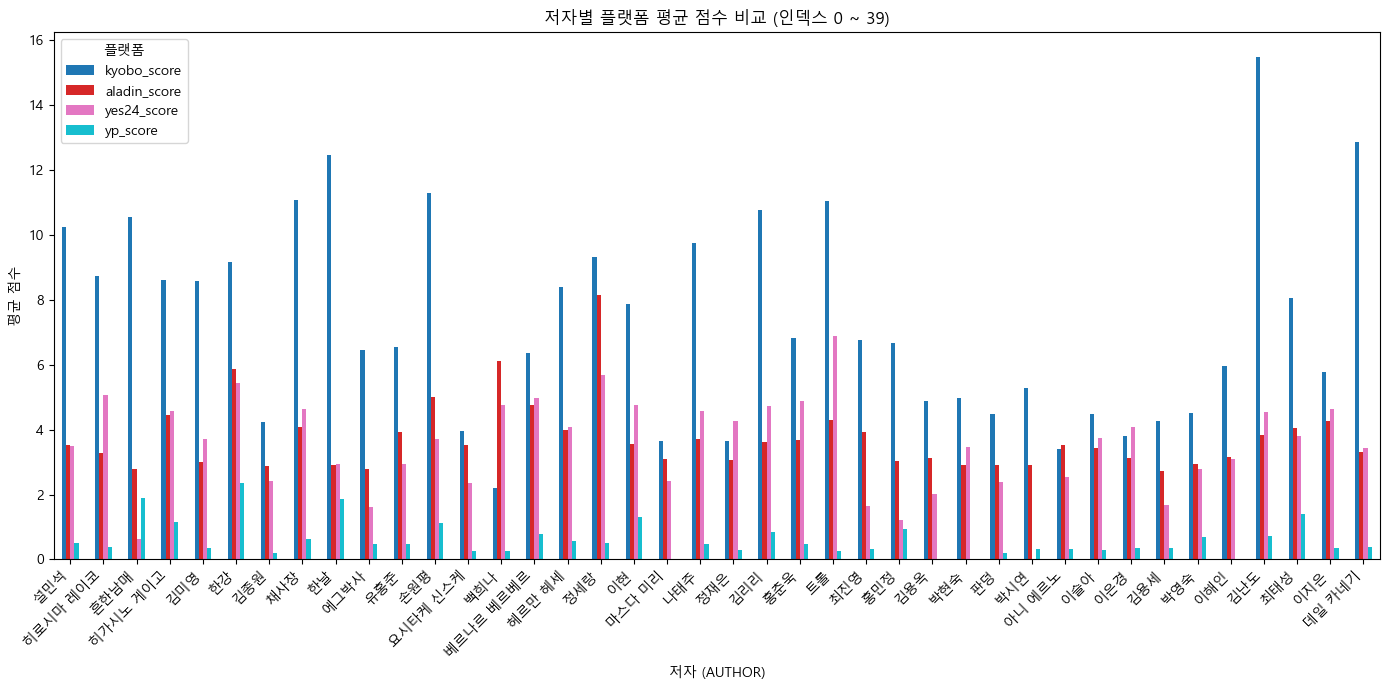

In [47]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 설정 (예: 0 ~ 9번째 저자)
start_idx = 0
end_idx = 40

# 슬라이싱된 데이터
sliced_author_summary = author_summary_sorted.iloc[start_idx:end_idx]

# 플랫폼 점수 열들
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
sliced_author_summary[platform_scores].plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'저자별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx - 1})')
plt.xlabel('저자 (AUTHOR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

In [48]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. 저자별 등장 횟수 계산
author_counts1 = df1['AUTHOR'].value_counts()

# 3. 저자별 평균 점수 계산
author_score_by_platform1 = df1.groupby('AUTHOR')[platform_scores].mean().round(2)

# 4. 등장횟수를 데이터프레임으로 변환하고 합치기
author_counts_df1 = author_counts1.rename('등장횟수').to_frame()
author_summary1 = author_score_by_platform1.join(author_counts_df1)

# 5. 등장횟수 내림차순 정렬
author_summary_sorted1 = author_summary1.sort_values(by='등장횟수', ascending=False)

# 6. 결과 출력
author_summary_sorted1

,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
AUTHOR,,,,,
사이토 다카,1.88,3.19,3.48,0.0,6
김,1.08,1.88,1.93,0.0,5
김성화,2.39,2.87,3.11,0.0,5
이상규,0.46,0.00,0.00,0.0,5
이상호,0.56,0.00,0.00,0.0,5
...,...,...,...,...,...
히토쓰바,2.60,2.91,4.17,0.0,1
히포크라테스,2.35,0.00,0.00,0.0,1
羅玄 著,2.80,0.00,0.00,0.0,1


<Figure size 1400x700 with 0 Axes>

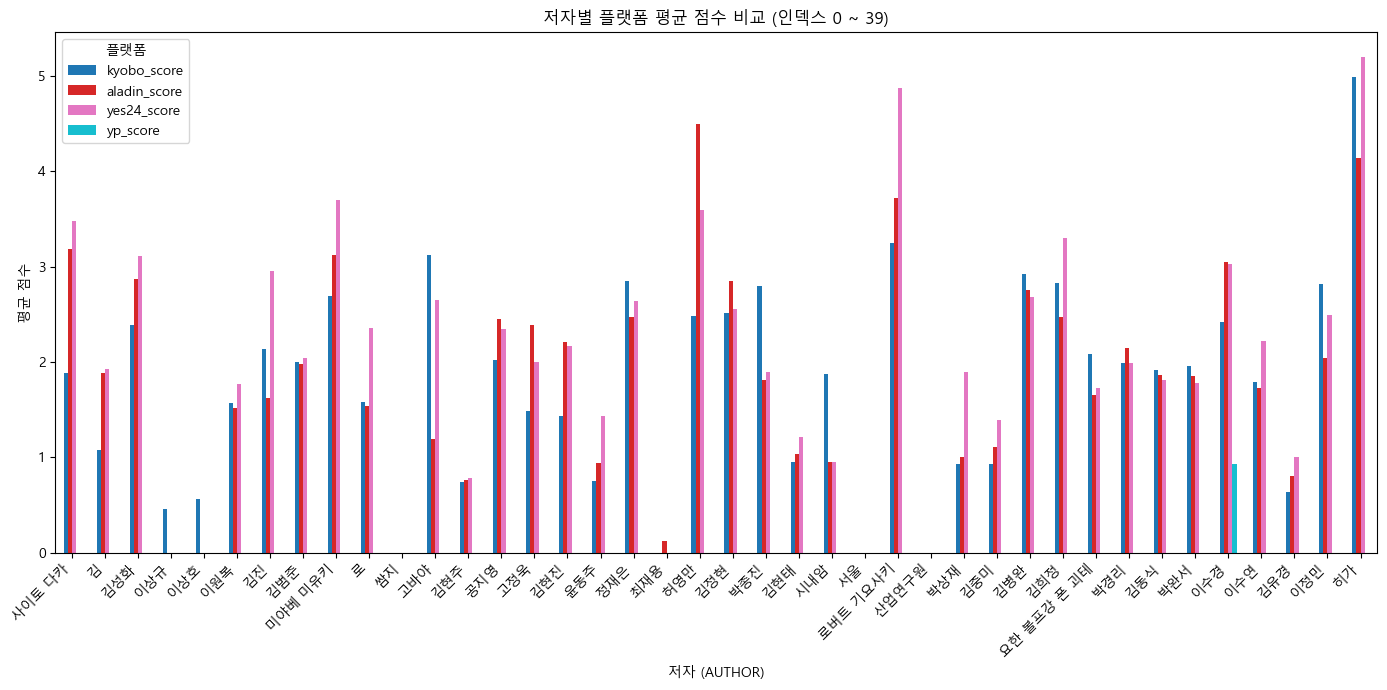

In [49]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 설정 (예: 0 ~ 9번째 저자)
start_idx = 0
end_idx = 40

# 슬라이싱된 데이터
sliced_author_summary1 = author_summary_sorted1.iloc[start_idx:end_idx]

# 플랫폼 점수 열들
platform_scores1 = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
sliced_author_summary1[platform_scores1].plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'저자별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx - 1})')
plt.xlabel('저자 (AUTHOR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

In [50]:
# 전체 저자 수
total_authors_1 = len(author_summary_sorted.index)
total_authors_2 = len(author_summary_sorted1.index)

# 공통 저자
common_authors = author_summary_sorted.index.intersection(author_summary_sorted1.index)
common_count = len(common_authors)

# 공통 저자의 비율 계산
common_ratio_1 = common_count / total_authors_1 * 100
common_ratio_2 = common_count / total_authors_2 * 100

# 결과 출력
print(f"author_summary_sorted 저자 수: {total_authors_1}명")
print(f"author_summary_sorted1 저자 수: {total_authors_2}명")
print(f"공통 저자 수: {common_count}명")

print(f"공통 저자 비율 (author_summary_sorted 기준): {common_ratio_1:.2f}%")
print(f"공통 저자 비율 (author_summary_sorted1 기준): {common_ratio_2:.2f}%")

author_summary_sorted 저자 수: 3239명
author_summary_sorted1 저자 수: 4758명
공통 저자 수: 343명
공통 저자 비율 (author_summary_sorted 기준): 10.59%
공통 저자 비율 (author_summary_sorted1 기준): 7.21%


- 베스트셀러
설민석, 히사시고 게이고, 한강, 김난도 등 상대적으로 유명한 저자들 다수
대부분의 베스트셀러의 저자들의 경우 교보가 우세
전체 저자 수 3239명

- 비베스트
전체 저자 수는 4758 명으로 베스트셀러보다 저자가 다양함
허영만, 로버트 기요사키, 히가 등 몇몇 저자의 경우 yes24, 알라딘에서 매우 강세를 보여줌

-> 둘 사이의 공통 저자를 봤을 때 베스트 데이터 기준 10%가 겹침, 베스트셀러와 비베스트셀러간의 공통되지 않는 저자가 대다수이기에 베스트셀러의 경우 저자의 이름을 보고 고객들이 책을 구매하는 경향이 어느정도 있다고 판단됨, 이로 보아 베스트셀러 여부에 저자는 영향을 끼침

# 도서평가점수 1점 차이 산출

In [46]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [57]:
df[['kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score']]

,kyobo_pnscore,kyobo_review,kyobo_rating,kyobo_score
0,0.93,271.0,4.72,28.70
1,0.91,107.0,4.93,12.32
2,0.89,328.0,4.79,34.38
3,1.00,9.0,5.00,2.60
4,0.94,213.0,4.90,22.94
...,...,...,...,...
5138,0.67,6.0,5.00,2.07
5139,0.78,9.0,4.89,2.42
5140,1.00,9.0,5.00,2.60
5141,0.93,28.0,5.00,4.45


In [59]:
df['kyobo_score'].describe()

count    5143.000000
mean        7.859930
std         9.916453
min         0.000000
25%         2.880000
50%         4.730000
75%         8.875000
max        92.420000
Name: kyobo_score, dtype: float64

In [58]:
# 1. score 10점대와 11점대 비교 그룹 만들기
group_10 = df[(df['kyobo_score'] >= 9.9) & (df['kyobo_score'] <= 10.1)]
group_11 = df[(df['kyobo_score'] >= 10.9) & (df['kyobo_score'] <= 11.1)]

# 2. 평균값 비교
score_compare = pd.DataFrame({
    'pnscore': [group_10['kyobo_pnscore'].mean(), group_11['kyobo_pnscore'].mean()],
    'review': [group_10['kyobo_review'].mean(), group_11['kyobo_review'].mean()],
    'rating': [group_10['kyobo_rating'].mean(), group_11['kyobo_rating'].mean()]
}, index=['score_10', 'score_11'])

# 3. 요소별 차이 계산
score_compare.loc['차이'] = score_compare.loc['score_11'] - score_compare.loc['score_10']

# 4. 각 요소별 기여도 계산 (가중치 반영)
contrib = {
    'pnscore': score_compare.loc['차이', 'pnscore'] * 0.7,
    'review': score_compare.loc['차이', 'review'] * 0.1,
    'rating': score_compare.loc['차이', 'rating'] * 0.2
}
contrib['합계'] = sum(contrib.values())

# 5. 출력
print("\n📊 요소별 score 변화 기여도")
for k, v in contrib.items():
    print(f"{k}: {v:.3f}")






📊 요소별 score 변화 기여도
pnscore: -0.002
review: 1.012
rating: 0.015
합계: 1.024


# 장르별 베스트셀러 등재율

In [52]:
# 대상 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 각 열에 대해 1 이상이면 1로 바꾸기
df[best_columns] = df[best_columns].applymap(lambda x: 1 if x >= 1 else x)

C:\Users\user\AppData\Local\Temp\ipykernel_9508\1461591956.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[best_columns] = df[best_columns].applymap(lambda x: 1 if x >= 1 else x)


In [11]:
# 1. 플랫폼 베스트셀러 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 2. CLASS_NO별 총 도서 수 계산
class_total = df.groupby('CLASS_NO').size().rename('total_count')

# 3. CLASS_NO별 베스트셀러 등재 수 합산
class_best_counts = df.groupby('CLASS_NO')[best_columns].sum()

# 4. CLASS_NO별 등재율 계산
class_best_ratio = class_best_counts.div(class_total, axis=0).round(3)

# 5. 등재율 데이터프레임에 CLASS_NO별 총 수 포함
class_best_ratio['total_count'] = class_total

# 베스트셀러 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 장르별 (CLASS_NO) 각 플랫폼 베스트셀러 등재 수 합계
genre_best_counts = df.groupby('CLASS_NO')[best_columns].sum()

# 결과 확인
genre_best_counts

,kyobo_best,aladin_best,yes24_best,yp_best
CLASS_NO,,,,
가정학 및 가정생활,67.0,161.0,92.0,28.0
"강연집, 수필집, 연설문집",1.0,2.0,1.0,0.0
"건축, 건축학",3.0,2.0,1.0,3.0
경제학,702.0,606.0,506.0,390.0
경학,17.0,7.0,8.0,2.0
...,...,...,...,...
행정학,1.0,3.0,1.0,0.0
형이상학,1.0,2.0,0.0,0.0
화학,0.0,2.0,1.0,0.0


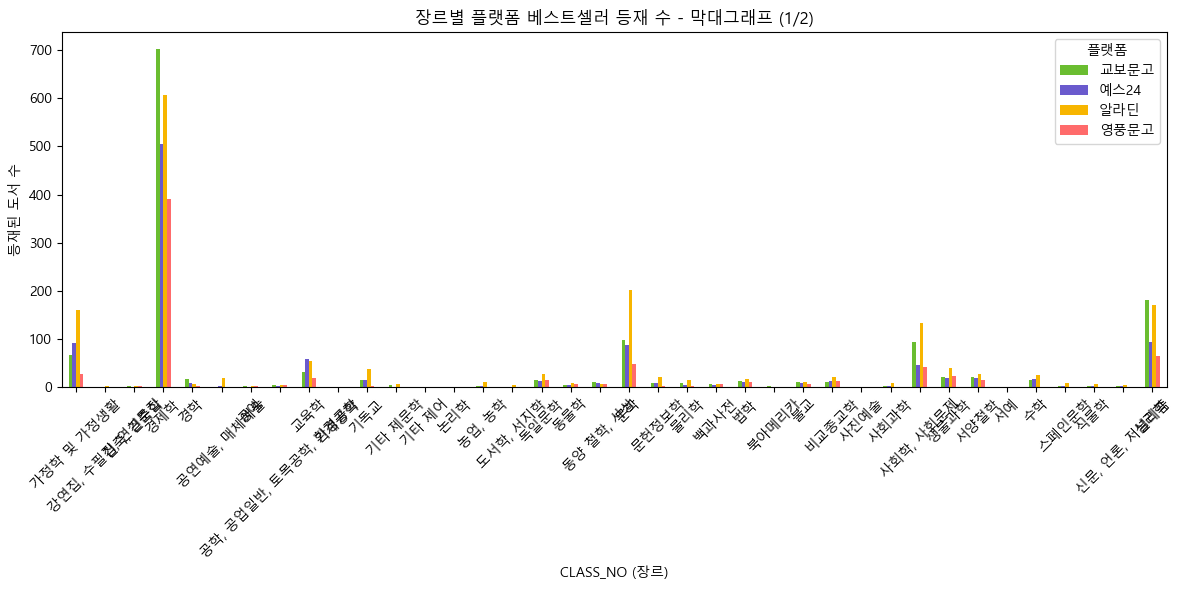

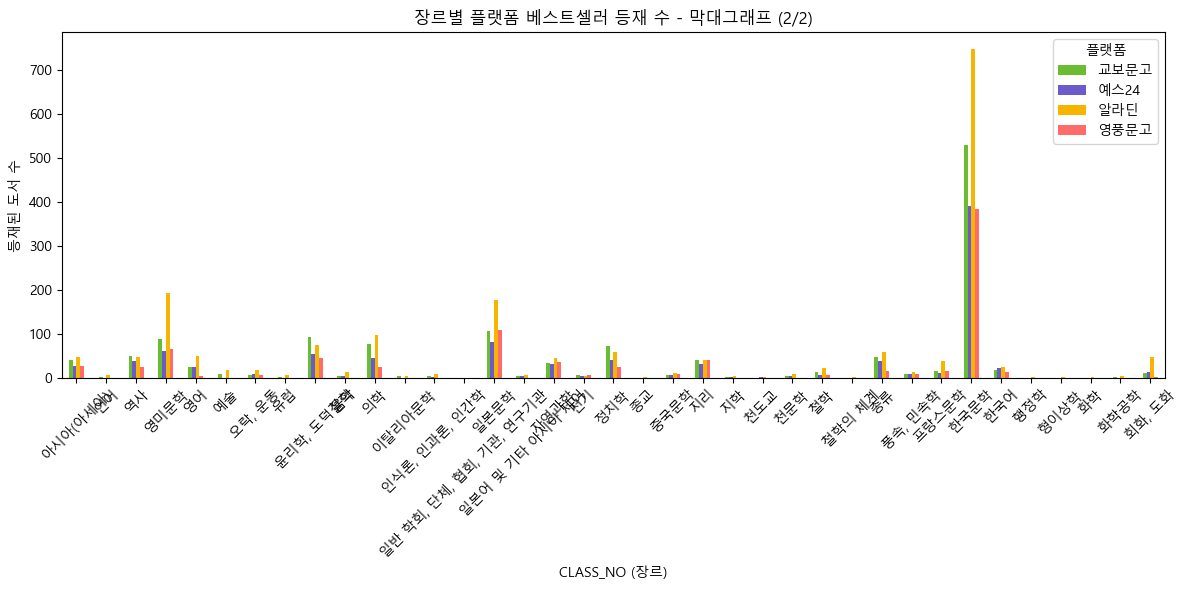

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# ✅ 플랫폼 이름 변경 (열 이름이 *_best일 경우)
genre_best_counts_renamed = genre_best_counts.rename(columns={
    'kyobo_best': '교보문고',
    'yes24_best': '예스24',
    'aladin_best': '알라딘',
    'yp_best': '영풍문고'
})

# ✅ 색상 정의
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ CLASS_NO가 많을 경우 대비해서 두 개로 나누기
split_size = len(genre_best_counts_renamed) // 2 + len(genre_best_counts_renamed) % 2
split1 = genre_best_counts_renamed.iloc[:split_size]
split2 = genre_best_counts_renamed.iloc[split_size:]

# ✅ 반복 처리
splits = [split1, split2]
titles = ['(1/2)', '(2/2)']

# ✅ Grouped Bar Chart
for i, data in enumerate(splits):
    data[platforms].plot(kind='bar', figsize=(12, 6), color=colors)
    plt.title(f'장르별 플랫폼 베스트셀러 등재 수 - 막대그래프 {titles[i]}')
    plt.xlabel('CLASS_NO (장르)')
    plt.ylabel('등재된 도서 수')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()



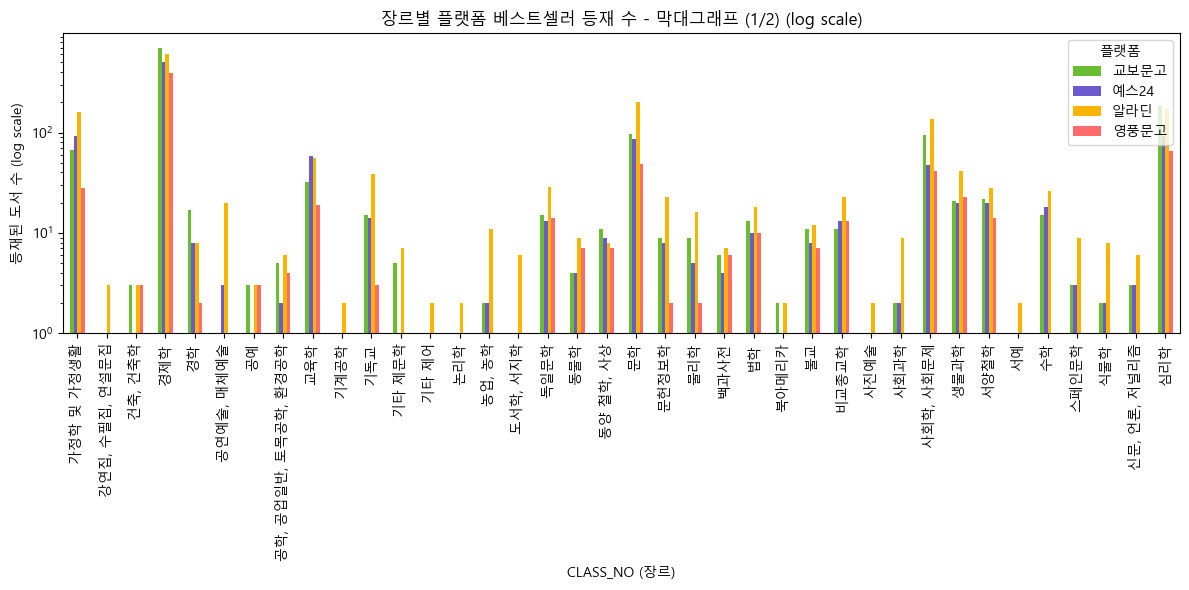

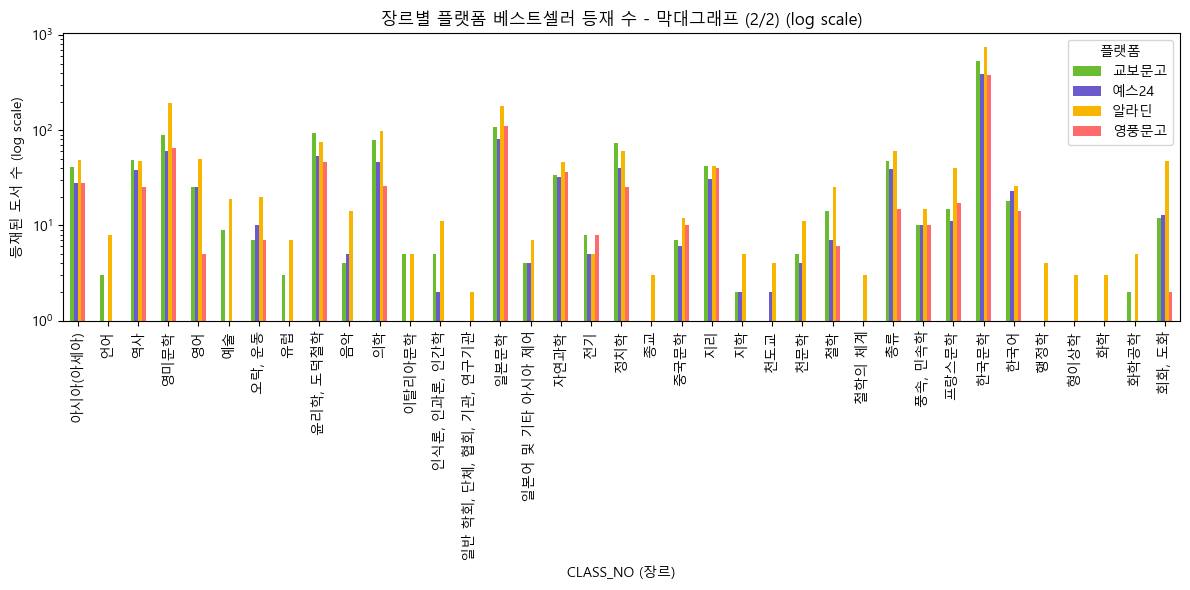

In [14]:
for i, data in enumerate(splits):
    ax = data[platforms].plot(kind='bar', figsize=(12, 6), log=True, color=colors)  # log scale 적용
    plt.title(f'장르별 플랫폼 베스트셀러 등재 수 - 막대그래프 {titles[i]} (log scale)')
    plt.xlabel('CLASS_NO (장르)')
    plt.ylabel('등재된 도서 수 (log scale)')
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()

In [15]:
# 1. 베스트셀러 플랫폼 목록
platforms = ['kyobo_best', 'yes24_best', 'yp_best']

# 2. 알라딘 베스트셀러 데이터만 추출
df_aladin_best = df[df['aladin_best'] == 1]

# 3. CLASS_NO(장르)별 알라딘 베스트셀러 수
aladin_genre_counts = df_aladin_best.groupby('CLASS_NO').size()

# 4. 장르별 다른 플랫폼 베스트셀러 수 계산 (알라딘 베스트셀러 중에서)
platform_genre_counts = df_aladin_best.groupby('CLASS_NO')[platforms].sum()

# 5. 장르별 각 플랫폼 등재율 계산
platform_genre_ratio = platform_genre_counts.div(aladin_genre_counts, axis=0).fillna(0).round(3) * 100

# 6. 보기 좋게 출력
platform_genre_ratio

,kyobo_best,yes24_best,yp_best
CLASS_NO,,,
가정학 및 가정생활,25.5,44.1,8.7
"강연집, 수필집, 연설문집",50.0,50.0,0.0
"건축, 건축학",100.0,50.0,50.0
경제학,68.2,70.1,39.8
경학,57.1,85.7,28.6
...,...,...,...
행정학,0.0,33.3,0.0
형이상학,50.0,0.0,0.0
화학,0.0,50.0,0.0


In [16]:
# 1. 알라딘 베스트셀러 데이터 필터링
df_aladin_best = df[df['aladin_best'] == 1]

# 2. 알라딘 베스트셀러 총 도서 수
aladin_total = len(df_aladin_best)

# 3. 각 플랫폼별 알라딘 베스트셀러 중복 수 계산
overlap_kyobo = df_aladin_best['kyobo_best'].sum()
overlap_yes24 = df_aladin_best['yes24_best'].sum()
overlap_yp = df_aladin_best['yp_best'].sum()

# 4. 비율 계산 (%)
overlap_ratios = {
    '교보와 중복 비율 (%)': round(overlap_kyobo / aladin_total * 100, 2),
    '예스24와 중복 비율 (%)': round(overlap_yes24 / aladin_total * 100, 2),
    '영풍과 중복 비율 (%)': round(overlap_yp / aladin_total * 100, 2)
}

# 5. 결과 출력
for platform, ratio in overlap_ratios.items():
    print(f"{platform}: {ratio}%")

교보와 중복 비율 (%): 44.99%
예스24와 중복 비율 (%): 47.16%
영풍과 중복 비율 (%): 25.3%


In [17]:
platforms = ['kyobo_best', 'yes24_best', 'yp_best']

overlap_with_aladin = {}

for platform in platforms:
    # 해당 플랫폼 베스트셀러 도서만 필터링
    df_platform_best = df[df[platform] == 1]
    
    # 해당 플랫폼 베스트셀러 총 수
    platform_total = len(df_platform_best)
    
    # 해당 플랫폼 베스트셀러 중 알라딘 베스트셀러와 겹치는 수
    overlap_count = df_platform_best['aladin_best'].sum()
    
    # 겹치는 비율 계산
    ratio = (overlap_count / platform_total * 100) if platform_total > 0 else 0
    overlap_with_aladin[platform] = round(ratio, 2)

# 보기 좋은 이름으로 출력
for platform, ratio in overlap_with_aladin.items():
    print(f"{platform} 기준 알라딘 중복 비율: {ratio}%")

kyobo_best 기준 알라딘 중복 비율: 59.31%
yes24_best 기준 알라딘 중복 비율: 83.42%
yp_best 기준 알라딘 중복 비율: 56.79%


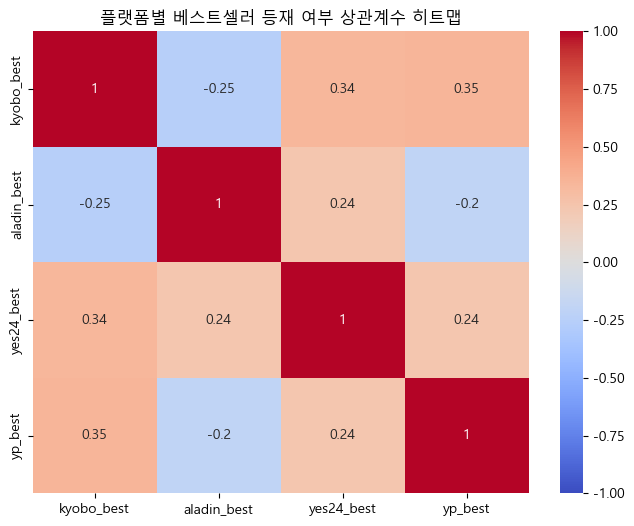

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 플랫폼별 베스트셀러 여부 컬럼
platform_cols = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 2. 피어슨 상관계수 계산
corr_matrix = df[platform_cols].corr()

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('플랫폼별 베스트셀러 등재 여부 상관계수 히트맵')
plt.show()

In [61]:
# 각 플랫폼에서 best 값이 1인 도서 수 계산
kyobo_count = df['kyobo_best'].sum()
aladin_count = df['aladin_best'].sum()
yes24_count = df['yes24_best'].sum()
yp_count = df['yp_best'].sum()

# 출력
print("교보문고 베스트 도서 수:", kyobo_count)
print("알라딘 베스트 도서 수:", aladin_count)
print("예스24 베스트 도서 수:", yes24_count)
print("영풍문고 베스트 도서 수:", yp_count)



교보문고 베스트 도서 수: 2735.0
알라딘 베스트 도서 수: 3605.0
예스24 베스트 도서 수: 2038.0
영풍문고 베스트 도서 수: 1606.0


# 출판시기별 베스트셀러

In [18]:
# 플랫폼 베스트셀러 열
platforms = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 출간연도별 플랫폼별 베스트셀러 수 계산
best_count_by_year = df.groupby('PUBLER_YEAR')[platforms].sum()

# 결과 출력
best_count_by_year


,kyobo_best,aladin_best,yes24_best,yp_best
PUBLER_YEAR,,,,
1998,1.0,0.0,0.0,0.0
2000,1.0,1.0,0.0,0.0
2001,2.0,3.0,2.0,2.0
2002,3.0,3.0,2.0,1.0
2003,1.0,2.0,1.0,0.0
2004,2.0,2.0,1.0,1.0
2005,3.0,3.0,3.0,2.0
2006,1.0,2.0,1.0,1.0
2007,2.0,4.0,3.0,2.0


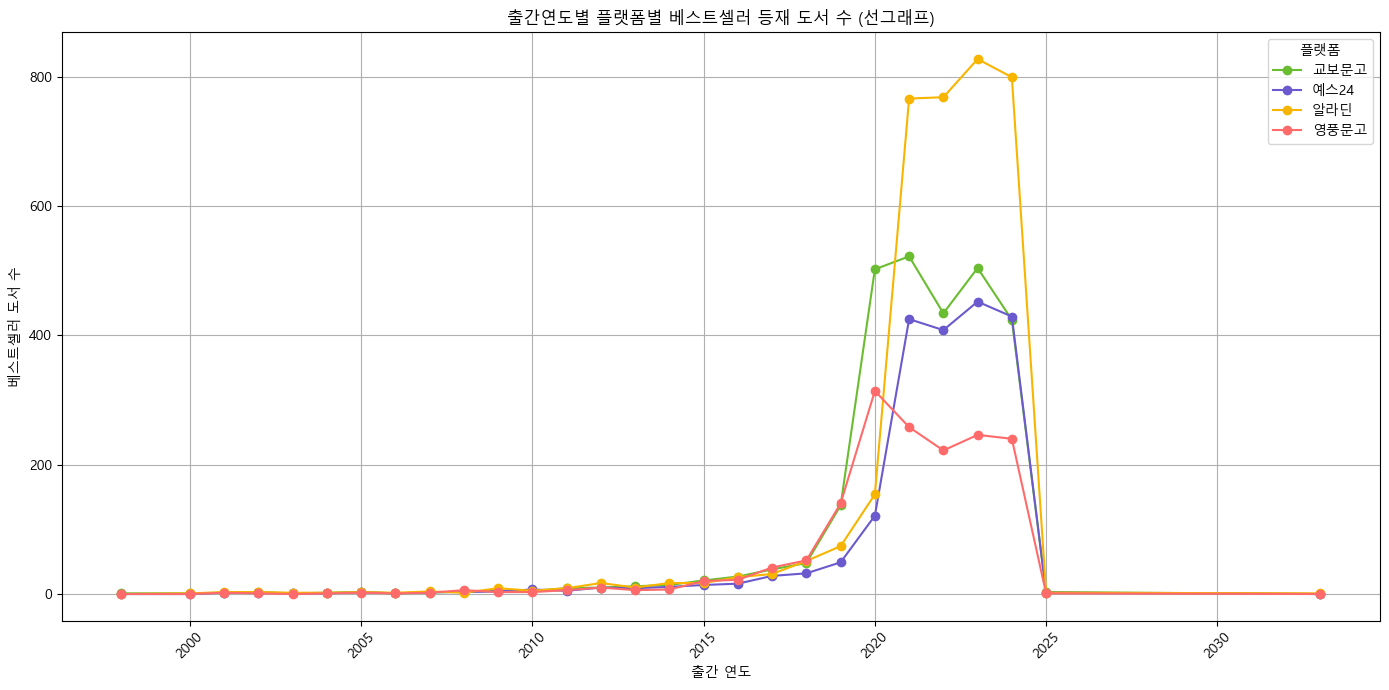

In [19]:
import matplotlib.pyplot as plt

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 열 이름 변경
best_count_renamed = best_count_by_year.rename(columns={
    'kyobo_best': '교보문고',
    'yes24_best': '예스24',
    'aladin_best': '알라딘',
    'yp_best': '영풍문고'
})

# ✅ 선 색상 수동 지정
platforms = ['교보문고', '예스24', '알라딘', '영풍문고']
colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']

# ✅ 선그래프 그리기
ax = best_count_renamed[platforms].plot(
    kind='line', 
    marker='o', 
    figsize=(14, 7), 
    color=colors
)

plt.title('출간연도별 플랫폼별 베스트셀러 등재 도서 수 (선그래프)')
plt.xlabel('출간 연도')
plt.ylabel('베스트셀러 도서 수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.grid(True)
plt.tight_layout()
plt.show()


# 플랫폼별 도서 평가점수 평균

In [24]:
# 플랫폼별 점수 컬럼 매핑
platform_to_score = {
    'kyobo_best': 'kyobo_score',
    'aladin_best': 'aladin_score',
    'yes24_best': 'yes24_score',
    'yp_best': 'yp_score'
}

# 결과 저장용 딕셔너리
avg_scores = {}

# 각 플랫폼에 대해 베스트셀러 필터링 후 평균 점수 계산
for best_col, score_col in platform_to_score.items():
    # 베스트셀러로 등재된 도서만 필터링
    best_df = df[df[best_col] == 1]
    
    # 해당 플랫폼의 평가 점수 평균 계산
    avg_score = best_df[score_col].mean()
    
    avg_scores[best_col.replace('_best', '')] = round(avg_score, 2)

# 결과 출력
for platform, score in avg_scores.items():
    print(f"{platform} 베스트셀러 도서의 평균 점수: {score}")

kyobo 베스트셀러 도서의 평균 점수: 7.21
aladin 베스트셀러 도서의 평균 점수: 3.5
yes24 베스트셀러 도서의 평균 점수: 3.36
yp 베스트셀러 도서의 평균 점수: 0.87


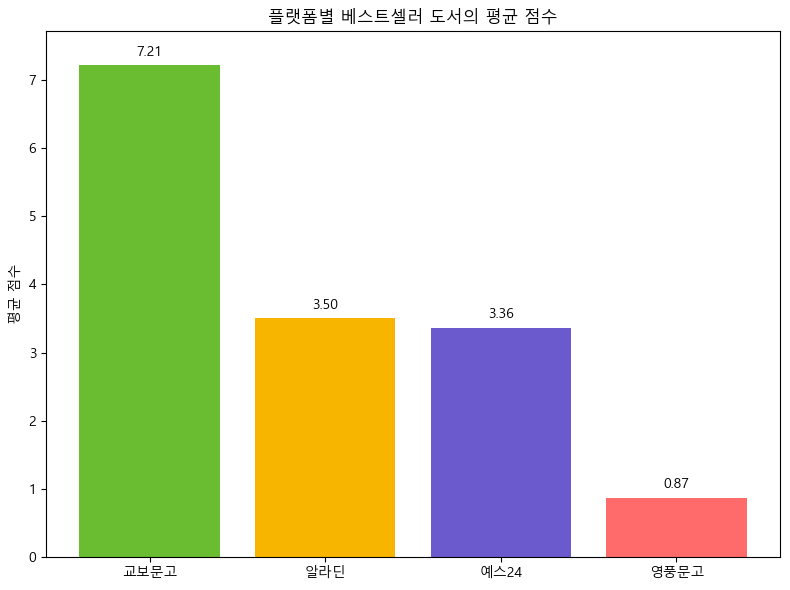

In [26]:
import matplotlib.pyplot as plt

# ✅ 원본 점수 데이터
avg_scores = {
    'kyobo': 7.21,
    'aladin': 3.50,
    'yes24': 3.36,
    'yp': 0.87
}

# ✅ 플랫폼 한글명 매핑
platform_name_map = {
    'kyobo': '교보문고',
    'yes24': '예스24',
    'aladin': '알라딘',
    'yp': '영풍문고'
}

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 이름 바꾸고 색상 지정
avg_scores_renamed = {platform_name_map[k]: v for k, v in avg_scores.items()}
platforms = list(avg_scores_renamed.keys())
scores = list(avg_scores_renamed.values())

colors = {
    '교보문고': '#6ABD30',
    '예스24': '#6A5ACD',
    '알라딘': '#F7B500',
    '영풍문고': '#FF6B6B'
}
bar_colors = [colors[platform] for platform in platforms]

# ✅ y축 여유값 설정
y_max = max(scores) + 0.5

# ✅ 막대그래프 시각화
plt.figure(figsize=(8, 6))
bars = plt.bar(platforms, scores, color=bar_colors)
plt.title('플랫폼별 베스트셀러 도서의 평균 점수')
plt.ylabel('평균 점수')
plt.ylim(0, y_max)

# ✅ 막대 위 숫자 출력
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [67]:
df.to_csv('베스트셀러_최종버전12.csv', index=False)

# 최종버전 11사용할거임
베스트셀러_최종버전11.csv -> 베스트셀러_최종버전12.csv
비베스트셀러_최종버전11.csv

-> 베스트셀러 데이터 플랫폼별 0과1로 바꾸는거 안되어있음 

# 도서평가점수 1점당 얼마정도의 차이인지
1점 = 리뷰수1개 + 감성점수 1.4% + 별점 0.06점